In [5]:
pip install librosa

  Using cached librosa-0.8.1-py3-none-any.whl (203 kB)
  Using cached pooch-1.4.0-py3-none-any.whl (51 kB)
  Using cached audioread-2.1.9.tar.gz (377 kB)
  Using cached resampy-0.2.2.tar.gz (323 kB)

  Created wheel for audioread: filename=audioread-2.1.9-py3-none-any.whl size=23141 sha256=e56450a56978818b0339e9cbe2883ea9a667de2e22eea6f73567ebb97338317f
  Stored in directory: c:\users\vedhanth\appdata\local\pip\cache\wheels\49\5a\e4\df590783499a992a88de6c0898991d1167453a3196d0d1eeb7
  Created wheel for resampy: filename=resampy-0.2.2-py3-none-any.whl size=320718 sha256=3559900260cb207f5cac66e5ec64f4552e2e4deffd5b8c2da3247cb653909fc5
  Stored in directory: c:\users\vedhanth\appdata\local\pip\cache\wheels\6f\d1\5d\f13da53b1dcbc2624ff548456c9ffb526c914f53c12c318bb4
Successfully built audioread resampy


In [12]:
import librosa
audio_data = 'sound sample.wav'
x , sr = librosa.load(audio_data,22050)
print(type(x), type(sr))#<class 'numpy.ndarray'> <class 'int'>
print(x.shape, sr) 

<class 'numpy.ndarray'> <class 'int'>
(524288,) 22050


In [13]:
librosa.load(audio_data, sr=22050)

(array([0.00384521, 0.00418091, 0.00448608, ..., 0.        , 0.        ,
        0.        ], dtype=float32),
 22050)

In [14]:
import IPython.display as ipd
ipd.Audio(audio_data)

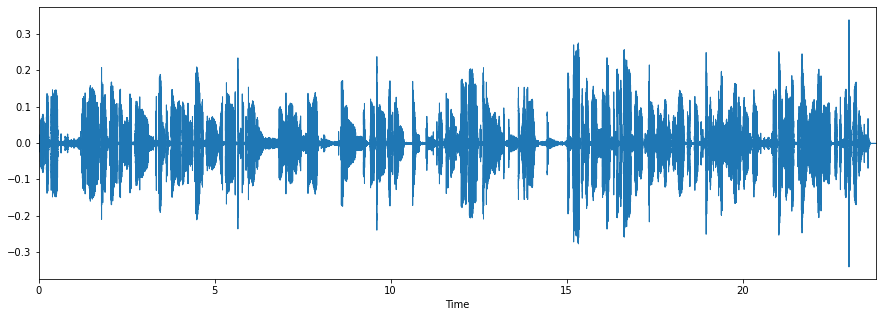

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(15, 5))
librosa.display.waveplot(x, sr=sr)

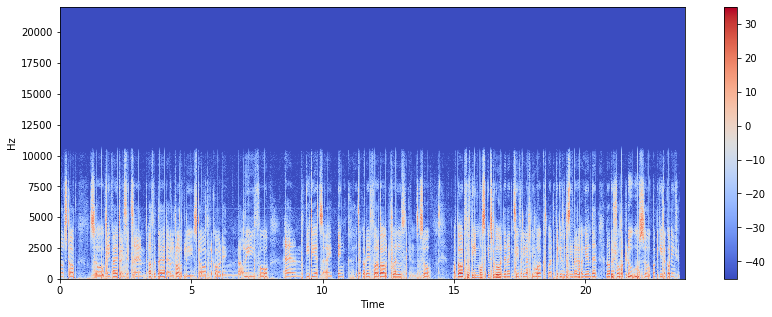

In [93]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

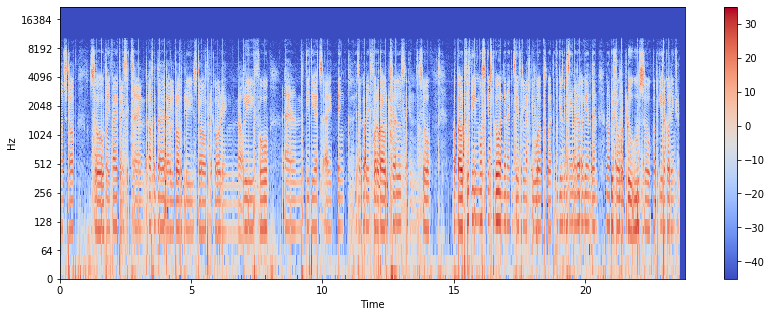

In [95]:

plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [97]:

# Creating an Audio Signal
import librosa
import numpy as np
sr = 22050 # sample rate
T = 5.0    # seconds
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*np.sin(2*np.pi*220*t)# pure sine wave at 220 Hz
#Playing the audio
ipd.Audio(x, rate=sr) # load a NumPy array

#Saving the audio
# librosa.output.write_wav('sound sample.wav', x, sr)

4
(20, 1025)


Text(0, 0.5, 'Mel-Frequency Cepstral Coefficients(MFCCs)')

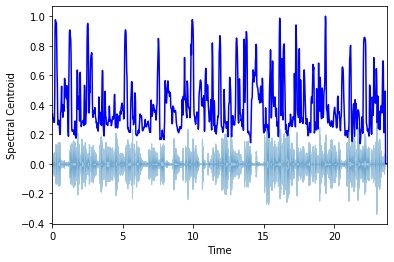

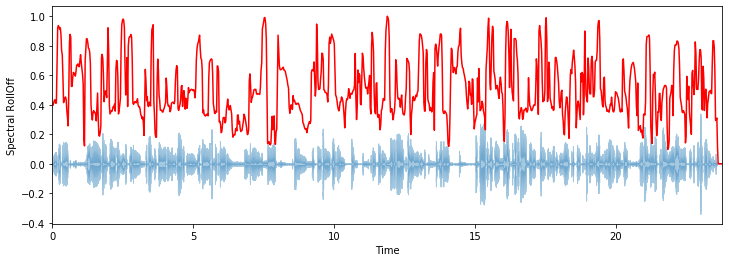

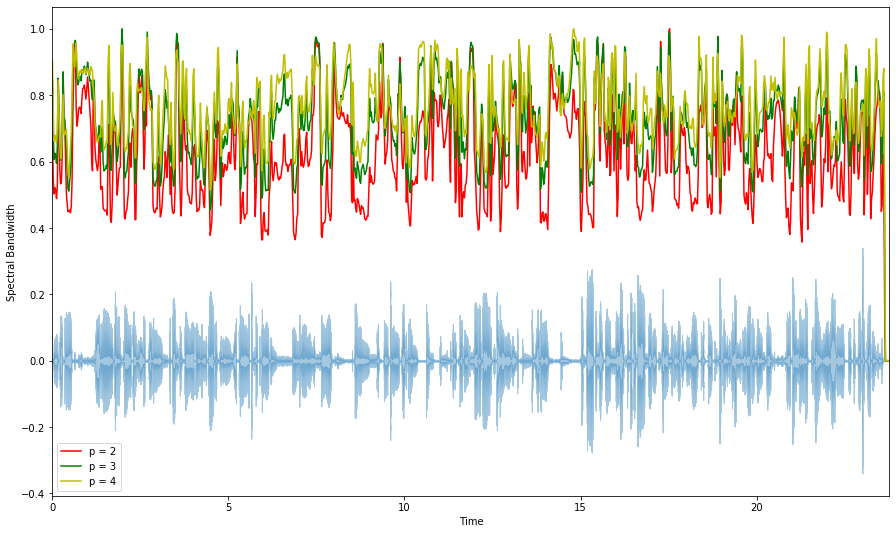

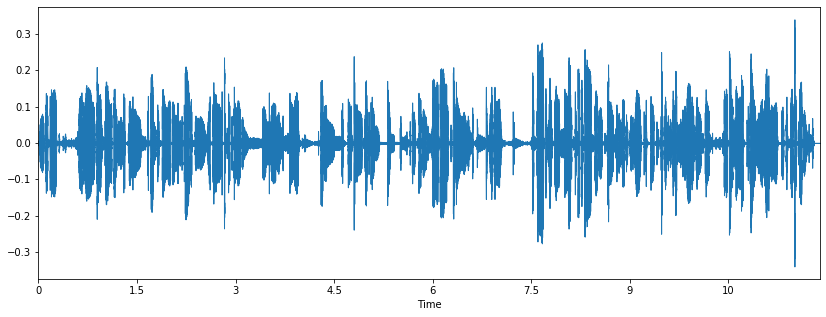

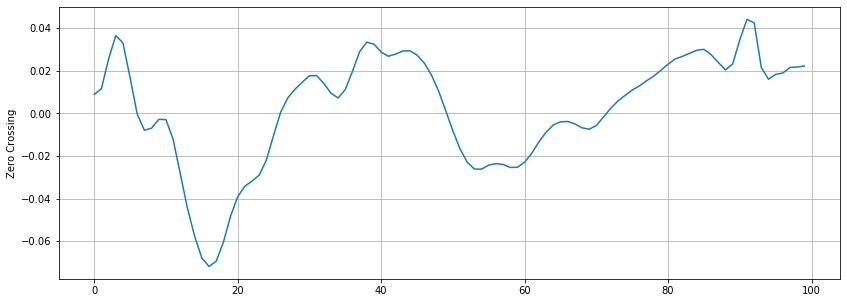

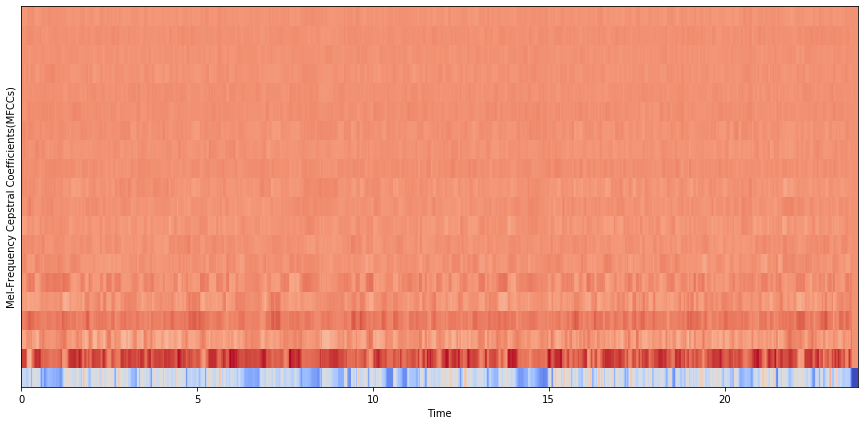

In [68]:
import librosa
import numpy as np
import sklearn



audio_data = 'sound sample.wav'
x , sr = librosa.load(audio_data)


# The spectral features (frequency-based features), which are obtained by converting the time-based signal into the frequency 
# domain using the Fourier Transform, like fundamental frequency, frequency components, spectral centroid, spectral flux,
# spectral density, spectral roll-off, etc.

# Spectral Centroid

# The spectral centroid indicates at which frequency the energy of a spectrum is centered upon or in other words It indicates 
# where the ” center of mass” for a sound is located. This is like a weighted mean:



# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')
plt.ylabel("Spectral Centroid")


# Spectral Rolloff

# It is a measure of the shape of the signal. It represents the frequency at which high frequencies decline to 0. 
# To obtain it, we have to calculate the fraction of bins in the power spectrum where 85% of its power is at lower frequencies.

# librosa.feature.spectral_rolloff computes the rolloff frequency for each frame in a signal:


spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
plt.figure(figsize=(12, 4))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')
plt.ylabel("Spectral RollOff")



# Spectral Bandwidth

# The spectral bandwidth is defined as the width of the band of light at one-half the peak 
# maximum (or full width at half maximum [FWHM]) and is represented by the two vertical red lines and λSB on the wavelength axis.


spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(15, 9))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))
plt.ylabel("Spectral Bandwidth")


# Zero-Crossing Rate

# A very simple way for measuring the smoothness of a signal is to calculate the number of zero-crossing within a segment
# of that signal. A voice signal oscillates slowly — for example, a 100 Hz signal will cross zero 100 per second -whereas 
# an unvoiced fricative can have 3000 zero crossings per second.


x, sr = librosa.load('sound sample.wav')
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=44100)
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))#16
plt.ylabel("Zero Crossing")



# Mel-Frequency Cepstral Coefficients(MFCCs)

# The Mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10–20) 
# which concisely describe the overall shape of a spectral envelope. It models the characteristics of the human voice.


mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)
(20, 97)
#Displaying  the MFCCs:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.ylabel("Mel-Frequency Cepstral Coefficients(MFCCs)")

#  A chroma feature or vector is typically a 12-element feature vector indicating how much energy of each pitch class, 
#  {C, C#, D, D#, E, …, B}, is present in the signal. 
#  In short, It provides a robust way to describe a similarity measure between music pieces.

# librosa.feature.chroma_stft is used for the computation of Chroma features. 
                                                                                                                     
# chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=100)
# plt.figure(figsize=(15, 5))
# librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=100 cmap='coolwarm')


In [18]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
%matplotlib inline
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (9, 7)
sampFreq, sound = wavfile.read('./sound sample.wav')

In [19]:
sound.dtype, sampFreq

(dtype('int16'), 44100)

In [20]:
sound = sound / 2.0**15

# Now let's see the shape of the sound array. The wav file has two channels and 45568 sample points
sound.shape

(558720, 2)

In [21]:
# Considering the sampling rate (sampFreq = 44110) this corresponds to a duration of around 1.03 seconds

length_in_s = sound.shape[0] / sampFreq
print(length_in_s)

12.66938775510204


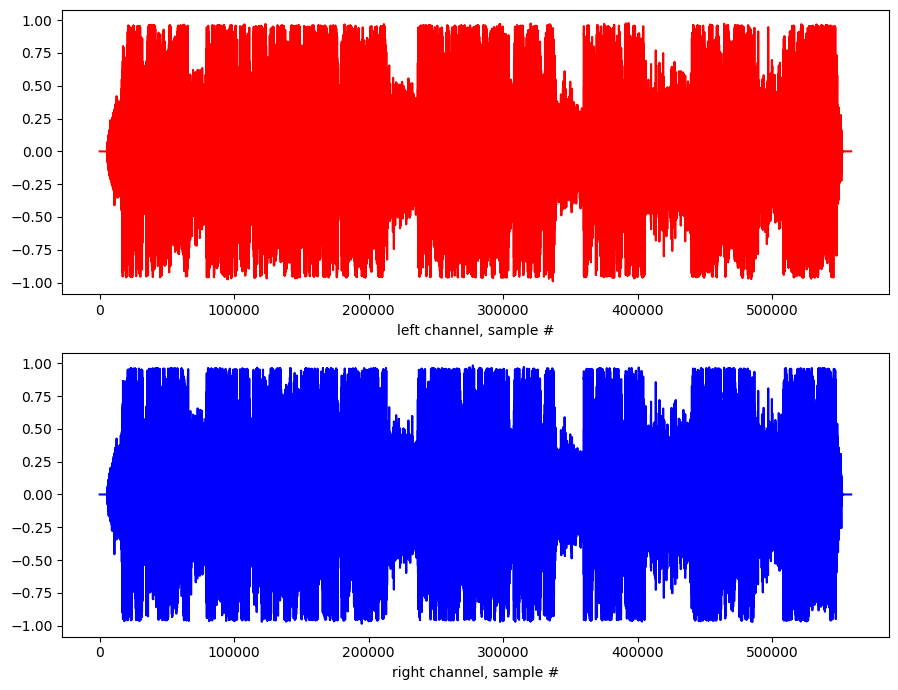

In [73]:
# Plotting the sound signal on each channel
# A time representation of the sound can be obtained by plotting the pressure values against the time axis.

plt.subplot(2,1,1)
plt.plot(sound[:,0], 'r')
plt.xlabel("left channel, sample #")
plt.subplot(2,1,2)
plt.plot(sound[:,1], 'b')
plt.xlabel("right channel, sample #")
plt.tight_layout()
plt.show()

In [22]:
# However, we need to create an array containing the time points first. 
# To get the proper time on the x-axis we have to generate a numpy array using sampFreq:

time = np.arange(sound.shape[0]) / sound.shape[0] * length_in_s

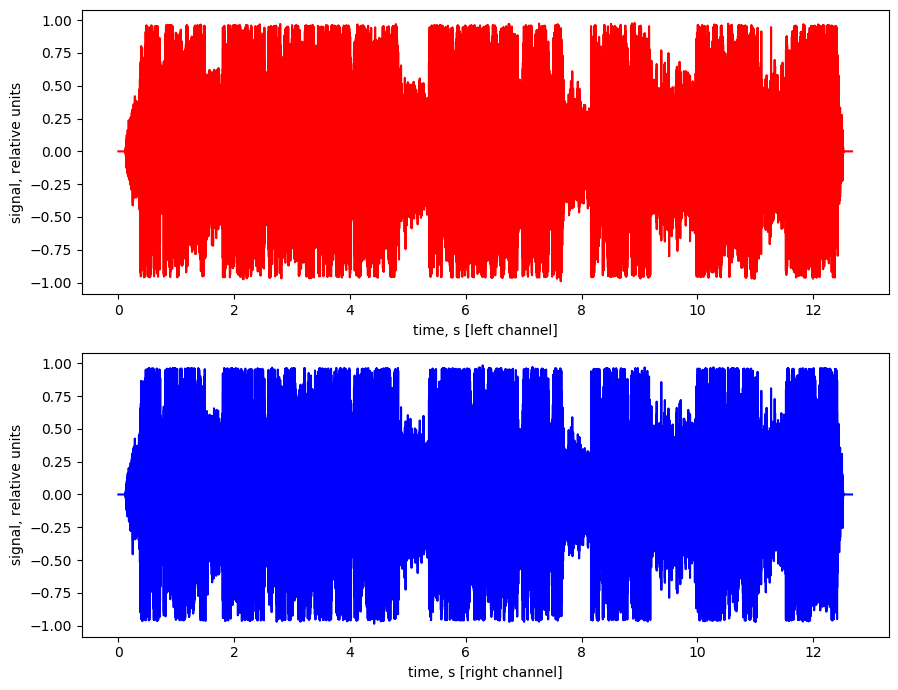

In [75]:
# Now let's look at the proper axis titles:

plt.subplot(2,1,1)
plt.plot(time, sound[:,0], 'r')
plt.xlabel("time, s [left channel]")
plt.ylabel("signal, relative units")
plt.subplot(2,1,2)
plt.plot(time, sound[:,1], 'b')
plt.xlabel("time, s [right channel]")
plt.ylabel("signal, relative units")
plt.tight_layout()
plt.show()

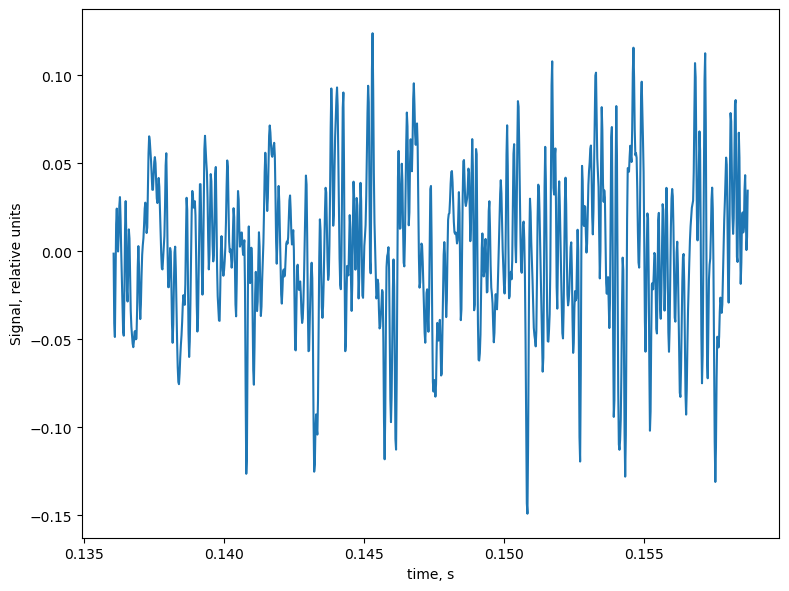

In [24]:
# We will select and work with only one of the channels from now on

signal = sound[:,0]

# We see a lot of oscillations and it's all pretty messy. We want to look at the sound with a higher resolution:
plt.plot(time[6000:7000], signal[6000:7000])
plt.xlabel("time, s")
plt.ylabel("Signal, relative units")
plt.show()

Plotting the frequency content with FT

A useful graphical representation is that of the frequency content, or spectrum of the note. 

Basically, we take a sound signal and isolate the frequencies of sine waves that make up that sound.


So we are going to use the `np.fft.rfft()` function. 

This is meant for data that doesn’t contain complex numbers only real numbers. 

The function `np.fft.rfftfreq()` always goes together with `np.fft.rfft()` because it gives the way to obtain 
the proper frequency units:

In [25]:
fft_spectrum = np.fft.rfft(signal)
freq = np.fft.rfftfreq(signal.size, d=1./sampFreq)

# The FFT of the data is usually complex:

fft_spectrum



array([-1.34342804e+02+0.00000000e+00j, -1.54842192e+01+1.91973215e+01j,
       -2.55613249e+01-1.74075730e+01j, ...,
       -7.60559157e-03-4.70708550e-03j,  2.14603174e-03+1.84763440e-03j,
       -8.27026367e-03+0.00000000e+00j])

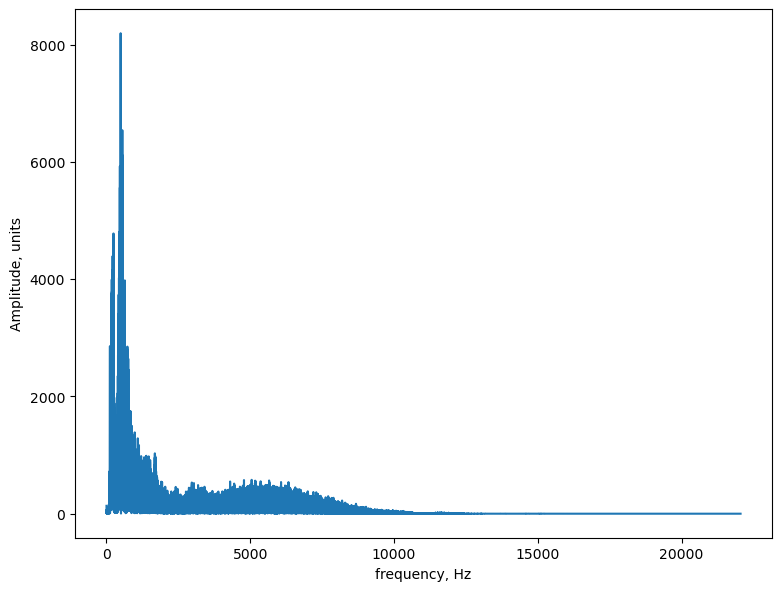

In [26]:
# To obtain the Amplitude vs. Frequency spectrum we find the absolute value of the fourier transform:

fft_spectrum_abs = np.abs(fft_spectrum)
                          
# Thus, the spectrum of the sound (frequency domain) looks like:
                          
plt.plot(freq, fft_spectrum_abs)
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, units")
plt.show()

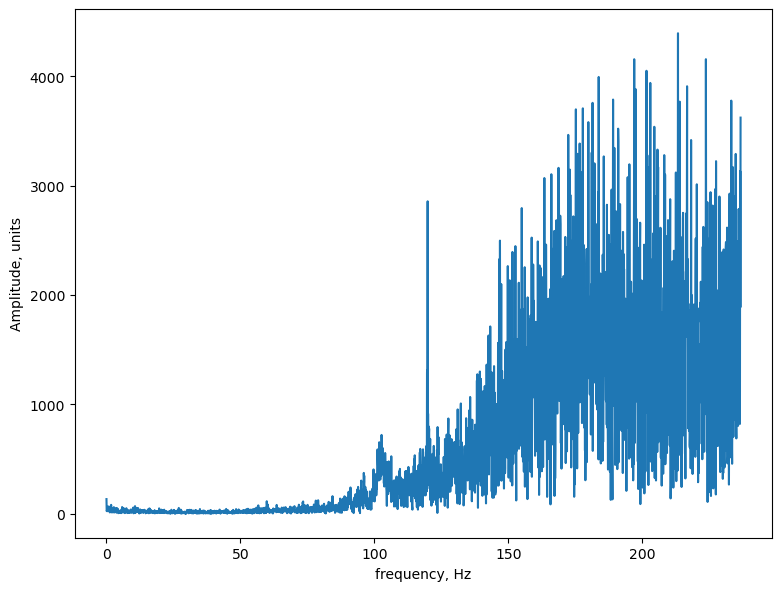

In [27]:
# A human can hear a sound that is in the 20-20,000 Hz range. 
# However, our sound doesn't contain frequencies greater than 3 kHz. It's interesting. Let's zoom in on the highest peaks:

plt.plot(freq[:3000], fft_spectrum_abs[:3000])
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, units")
plt.show()

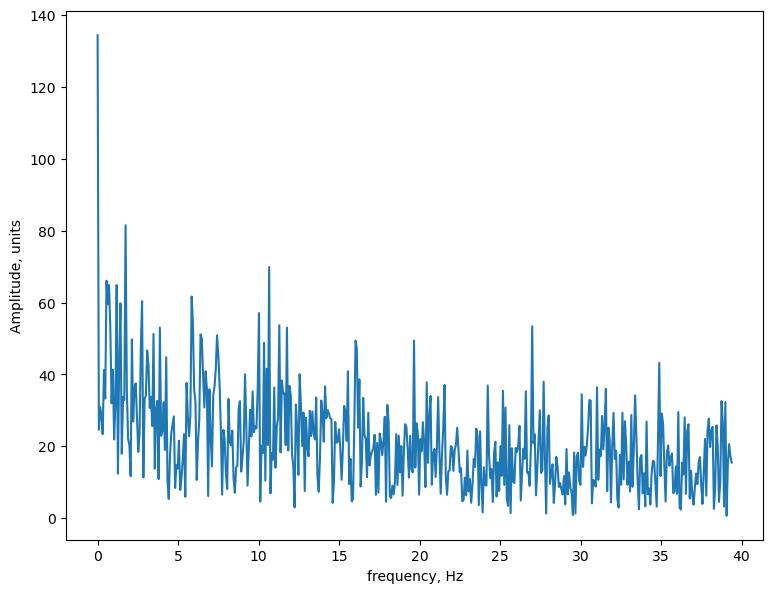

In [28]:
# We see a lot of equally spaced peaks, and the distance between them is ~235 Hz. Let's zoom in even more:

plt.plot(freq[:500], fft_spectrum_abs[:500])
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, units")

plt.show()

The plot shows one big spike at and around 60 Hz (black arrow). This is the frequency standard used for AC (Alternating Current) in North America where, probably, the recording was made, and it is very noticable when you play a sound. In Europe, for example, the standard frequency is 50 Hz.

The second highest peak is called a fundamental frequency (green arrow) - and it's near 233 Hz. The other spikes are called overtone harmonics and are multiples of the fundamental frequency. We see that except 60 Hz noise, there are spikes around 233 Hz, 465 Hz, 698 Hz, 932 Hz, 1167 Hz, 1401 Hz and 1638 Hz (all are multiples of ~233 Hz).

For music lovers: our sound is a semitone A of the third octave (or A3#) geneated by piano. Let's look at all the peaks more thoroughly:

import librosa
librosa.hz_to_note(440.0)

In [33]:
import librosa

for i,f in enumerate(fft_spectrum_abs):
      if f > 350 and f < 2000: #looking at amplitudes of the spikes higher than 350 
        print('frequency = {} Hz with amplitude {} '.format(np.round(freq[i],4),  np.round(f,5)))

frequency = 96.0583 Hz with amplitude 373.72055 
frequency = 99.6102 Hz with amplitude 359.30003 
frequency = 99.6891 Hz with amplitude 405.68959 
frequency = 100.6363 Hz with amplitude 364.09832 
frequency = 101.0309 Hz with amplitude 357.83836 
frequency = 101.1099 Hz with amplitude 559.15 
frequency = 101.1888 Hz with amplitude 588.55411 
frequency = 101.2677 Hz with amplitude 510.34386 
frequency = 101.3466 Hz with amplitude 449.92102 
frequency = 101.4256 Hz with amplitude 418.34247 
frequency = 101.5045 Hz with amplitude 479.13601 
frequency = 101.8202 Hz with amplitude 654.20949 
frequency = 101.8992 Hz with amplitude 427.07015 
frequency = 101.9781 Hz with amplitude 396.5435 
frequency = 102.057 Hz with amplitude 439.84387 
frequency = 102.136 Hz with amplitude 606.82553 
frequency = 102.2938 Hz with amplitude 438.87463 
frequency = 102.3727 Hz with amplitude 577.78705 
frequency = 102.4517 Hz with amplitude 542.1691 
frequency = 102.5306 Hz with amplitude 434.48121 
frequency 

frequency = 217.8479 Hz with amplitude 707.4304 
frequency = 217.9269 Hz with amplitude 1859.02324 
frequency = 218.0058 Hz with amplitude 1121.79507 
frequency = 218.0847 Hz with amplitude 416.33533 
frequency = 218.1637 Hz with amplitude 1170.58016 
frequency = 218.3215 Hz with amplitude 1456.78409 
frequency = 218.4005 Hz with amplitude 1483.9093 
frequency = 218.4794 Hz with amplitude 1888.29703 
frequency = 218.5583 Hz with amplitude 1999.14486 
frequency = 218.6372 Hz with amplitude 721.34419 
frequency = 218.7162 Hz with amplitude 1584.40952 
frequency = 218.7951 Hz with amplitude 364.1999 
frequency = 218.874 Hz with amplitude 994.77786 
frequency = 218.953 Hz with amplitude 1892.95653 
frequency = 219.0319 Hz with amplitude 863.28303 
frequency = 219.1108 Hz with amplitude 1561.90844 
frequency = 219.1898 Hz with amplitude 1308.54981 
frequency = 219.2687 Hz with amplitude 1913.75693 
frequency = 219.3476 Hz with amplitude 1886.10544 
frequency = 219.4265 Hz with amplitude 909

frequency = 292.1215 Hz with amplitude 1004.8358 
frequency = 292.2004 Hz with amplitude 888.29523 
frequency = 292.2793 Hz with amplitude 717.67613 
frequency = 292.3582 Hz with amplitude 627.97723 
frequency = 292.4372 Hz with amplitude 642.08087 
frequency = 292.5161 Hz with amplitude 628.93975 
frequency = 292.595 Hz with amplitude 723.78034 
frequency = 292.7529 Hz with amplitude 808.29188 
frequency = 292.8318 Hz with amplitude 616.22855 
frequency = 292.9108 Hz with amplitude 737.99422 
frequency = 292.9897 Hz with amplitude 604.12069 
frequency = 293.0686 Hz with amplitude 372.52833 
frequency = 293.1476 Hz with amplitude 808.00769 
frequency = 293.2265 Hz with amplitude 879.15456 
frequency = 293.3054 Hz with amplitude 551.80973 
frequency = 293.3843 Hz with amplitude 592.50392 
frequency = 293.4633 Hz with amplitude 395.28225 
frequency = 293.6211 Hz with amplitude 608.68633 
frequency = 293.7001 Hz with amplitude 422.158 
frequency = 293.779 Hz with amplitude 689.92219 
freq

frequency = 377.0506 Hz with amplitude 777.49269 
frequency = 377.1295 Hz with amplitude 944.50583 
frequency = 377.2084 Hz with amplitude 431.6573 
frequency = 377.2874 Hz with amplitude 364.64542 
frequency = 377.3663 Hz with amplitude 642.94438 
frequency = 377.5242 Hz with amplitude 525.88103 
frequency = 377.682 Hz with amplitude 1092.89136 
frequency = 377.761 Hz with amplitude 445.60338 
frequency = 377.8399 Hz with amplitude 731.40546 
frequency = 377.9188 Hz with amplitude 422.98502 
frequency = 378.1556 Hz with amplitude 1097.05949 
frequency = 378.2345 Hz with amplitude 431.66177 
frequency = 378.3135 Hz with amplitude 351.11238 
frequency = 378.4713 Hz with amplitude 1060.11231 
frequency = 378.6292 Hz with amplitude 363.44533 
frequency = 378.7081 Hz with amplitude 652.09121 
frequency = 378.787 Hz with amplitude 1063.37832 
frequency = 378.866 Hz with amplitude 569.86865 
frequency = 378.9449 Hz with amplitude 651.72851 
frequency = 379.1028 Hz with amplitude 542.81032 
f

frequency = 400.4929 Hz with amplitude 1768.22861 
frequency = 400.5718 Hz with amplitude 1061.08107 
frequency = 400.6508 Hz with amplitude 1136.66274 
frequency = 400.7297 Hz with amplitude 812.4944 
frequency = 400.8876 Hz with amplitude 1080.85833 
frequency = 400.9665 Hz with amplitude 1197.99675 
frequency = 401.2033 Hz with amplitude 1389.844 
frequency = 401.2822 Hz with amplitude 1739.76318 
frequency = 401.3611 Hz with amplitude 1208.85089 
frequency = 401.519 Hz with amplitude 707.92719 
frequency = 401.5979 Hz with amplitude 1631.54506 
frequency = 401.6769 Hz with amplitude 1460.08161 
frequency = 401.7558 Hz with amplitude 1305.07166 
frequency = 401.9137 Hz with amplitude 756.13612 
frequency = 402.0715 Hz with amplitude 631.81199 
frequency = 402.2294 Hz with amplitude 1665.371 
frequency = 402.3083 Hz with amplitude 1008.52249 
frequency = 402.3872 Hz with amplitude 1893.61608 
frequency = 402.4662 Hz with amplitude 1314.31499 
frequency = 402.5451 Hz with amplitude 15

frequency = 437.4323 Hz with amplitude 838.91728 
frequency = 437.5113 Hz with amplitude 1527.94123 
frequency = 437.5902 Hz with amplitude 1006.31211 
frequency = 437.6691 Hz with amplitude 1845.86897 
frequency = 437.827 Hz with amplitude 566.67624 
frequency = 437.9849 Hz with amplitude 948.76494 
frequency = 438.0638 Hz with amplitude 403.08717 
frequency = 438.1427 Hz with amplitude 1264.99131 
frequency = 438.2216 Hz with amplitude 1718.14224 
frequency = 438.3006 Hz with amplitude 1001.52047 
frequency = 438.4584 Hz with amplitude 1380.51325 
frequency = 438.5374 Hz with amplitude 793.70403 
frequency = 438.6163 Hz with amplitude 1097.08244 
frequency = 438.6952 Hz with amplitude 1235.25078 
frequency = 438.8531 Hz with amplitude 1411.91662 
frequency = 439.011 Hz with amplitude 1176.91614 
frequency = 439.0899 Hz with amplitude 1570.29924 
frequency = 439.2477 Hz with amplitude 1860.77862 
frequency = 439.3267 Hz with amplitude 1155.38163 
frequency = 439.4056 Hz with amplitude

frequency = 475.6347 Hz with amplitude 1956.37024 
frequency = 475.8715 Hz with amplitude 1225.97356 
frequency = 475.9504 Hz with amplitude 743.34783 
frequency = 476.0293 Hz with amplitude 1811.44445 
frequency = 476.1872 Hz with amplitude 1144.03506 
frequency = 476.2661 Hz with amplitude 791.22109 
frequency = 476.345 Hz with amplitude 1233.48582 
frequency = 476.424 Hz with amplitude 1651.56288 
frequency = 476.5029 Hz with amplitude 1196.81352 
frequency = 476.6608 Hz with amplitude 1200.51156 
frequency = 476.8976 Hz with amplitude 579.23367 
frequency = 477.0554 Hz with amplitude 1187.03524 
frequency = 477.1343 Hz with amplitude 1701.18941 
frequency = 477.2922 Hz with amplitude 1797.10564 
frequency = 477.4501 Hz with amplitude 1526.02733 
frequency = 477.6869 Hz with amplitude 826.30809 
frequency = 477.8447 Hz with amplitude 1003.51111 
frequency = 477.9236 Hz with amplitude 1339.94171 
frequency = 478.0026 Hz with amplitude 840.0908 
frequency = 478.1604 Hz with amplitude 

frequency = 596.7928 Hz with amplitude 421.13281 
frequency = 596.9507 Hz with amplitude 397.4436 
frequency = 597.0296 Hz with amplitude 821.48623 
frequency = 597.1086 Hz with amplitude 517.60631 
frequency = 597.1875 Hz with amplitude 1395.76237 
frequency = 597.2664 Hz with amplitude 373.60328 
frequency = 597.5032 Hz with amplitude 690.74895 
frequency = 597.5822 Hz with amplitude 1166.1423 
frequency = 597.6611 Hz with amplitude 979.17059 
frequency = 597.74 Hz with amplitude 902.53616 
frequency = 597.8189 Hz with amplitude 1705.18411 
frequency = 597.8979 Hz with amplitude 1616.82592 
frequency = 597.9768 Hz with amplitude 1127.34318 
frequency = 598.0557 Hz with amplitude 1001.73621 
frequency = 598.1347 Hz with amplitude 1795.03228 
frequency = 598.2136 Hz with amplitude 1368.01939 
frequency = 598.2925 Hz with amplitude 1081.93992 
frequency = 598.3715 Hz with amplitude 1962.83375 
frequency = 598.4504 Hz with amplitude 1345.33641 
frequency = 598.5293 Hz with amplitude 732.

frequency = 664.5941 Hz with amplitude 589.99075 
frequency = 664.673 Hz with amplitude 508.28332 
frequency = 664.7519 Hz with amplitude 624.20961 
frequency = 664.8309 Hz with amplitude 806.06513 
frequency = 664.9098 Hz with amplitude 615.30285 
frequency = 665.0677 Hz with amplitude 353.6878 
frequency = 665.1466 Hz with amplitude 1135.62712 
frequency = 665.2255 Hz with amplitude 1111.90792 
frequency = 665.4623 Hz with amplitude 782.49046 
frequency = 665.5412 Hz with amplitude 1001.4 
frequency = 665.6991 Hz with amplitude 569.7504 
frequency = 665.857 Hz with amplitude 877.98862 
frequency = 665.9359 Hz with amplitude 572.06382 
frequency = 666.1727 Hz with amplitude 655.00374 
frequency = 666.2516 Hz with amplitude 813.24978 
frequency = 666.3305 Hz with amplitude 416.80834 
frequency = 666.5673 Hz with amplitude 823.54457 
frequency = 666.6463 Hz with amplitude 1165.52674 
frequency = 666.8831 Hz with amplitude 793.62308 
frequency = 666.962 Hz with amplitude 1079.09577 
freq

frequency = 734.4475 Hz with amplitude 1862.08284 
frequency = 734.5264 Hz with amplitude 864.44932 
frequency = 734.6053 Hz with amplitude 909.1536 
frequency = 734.6843 Hz with amplitude 499.17867 
frequency = 734.7632 Hz with amplitude 616.39334 
frequency = 734.8421 Hz with amplitude 1370.82715 
frequency = 734.9211 Hz with amplitude 588.24828 
frequency = 735.0 Hz with amplitude 483.10167 
frequency = 735.0789 Hz with amplitude 481.51897 
frequency = 735.1579 Hz with amplitude 1127.94345 
frequency = 735.2368 Hz with amplitude 557.17506 
frequency = 735.3157 Hz with amplitude 1079.36423 
frequency = 735.3947 Hz with amplitude 652.29678 
frequency = 735.4736 Hz with amplitude 1409.27976 
frequency = 735.6314 Hz with amplitude 1108.48324 
frequency = 735.7104 Hz with amplitude 867.02767 
frequency = 735.7893 Hz with amplitude 1655.78466 
frequency = 735.8682 Hz with amplitude 1235.11216 
frequency = 735.9472 Hz with amplitude 1084.89255 
frequency = 736.0261 Hz with amplitude 830.94

frequency = 788.5938 Hz with amplitude 1003.26734 
frequency = 788.7516 Hz with amplitude 504.5327 
frequency = 788.8305 Hz with amplitude 1606.46871 
frequency = 788.9095 Hz with amplitude 607.06941 
frequency = 788.9884 Hz with amplitude 465.62971 
frequency = 789.0673 Hz with amplitude 1141.78078 
frequency = 789.1463 Hz with amplitude 880.96482 
frequency = 789.2252 Hz with amplitude 695.33908 
frequency = 789.3041 Hz with amplitude 796.71053 
frequency = 789.3831 Hz with amplitude 1037.57686 
frequency = 789.462 Hz with amplitude 366.91976 
frequency = 789.5409 Hz with amplitude 557.16046 
frequency = 789.6198 Hz with amplitude 1270.56754 
frequency = 789.6988 Hz with amplitude 413.74963 
frequency = 789.7777 Hz with amplitude 556.91993 
frequency = 789.9356 Hz with amplitude 723.05474 
frequency = 790.0145 Hz with amplitude 473.94354 
frequency = 790.1724 Hz with amplitude 447.19916 
frequency = 790.4091 Hz with amplitude 962.0607 
frequency = 790.567 Hz with amplitude 969.92529 

frequency = 843.6872 Hz with amplitude 374.10095 
frequency = 843.845 Hz with amplitude 688.16838 
frequency = 844.0029 Hz with amplitude 613.76902 
frequency = 844.0818 Hz with amplitude 572.1872 
frequency = 844.1608 Hz with amplitude 685.3994 
frequency = 844.2397 Hz with amplitude 948.91833 
frequency = 844.3186 Hz with amplitude 394.36147 
frequency = 844.3976 Hz with amplitude 697.43345 
frequency = 844.5554 Hz with amplitude 419.65934 
frequency = 844.6343 Hz with amplitude 815.07514 
frequency = 844.7922 Hz with amplitude 724.96046 
frequency = 844.8711 Hz with amplitude 667.29931 
frequency = 844.9501 Hz with amplitude 681.77177 
frequency = 845.029 Hz with amplitude 901.6017 
frequency = 845.1079 Hz with amplitude 355.98632 
frequency = 845.1869 Hz with amplitude 906.3275 
frequency = 845.2658 Hz with amplitude 396.33938 
frequency = 845.3447 Hz with amplitude 470.94947 
frequency = 845.5026 Hz with amplitude 505.9539 
frequency = 845.6604 Hz with amplitude 731.9624 
frequenc

frequency = 928.3795 Hz with amplitude 358.52308 
frequency = 928.4584 Hz with amplitude 378.6683 
frequency = 928.5374 Hz with amplitude 616.35028 
frequency = 928.6163 Hz with amplitude 464.43776 
frequency = 928.7742 Hz with amplitude 538.54737 
frequency = 928.8531 Hz with amplitude 701.12911 
frequency = 929.011 Hz with amplitude 748.73811 
frequency = 929.0899 Hz with amplitude 392.20074 
frequency = 929.4845 Hz with amplitude 386.49361 
frequency = 929.8792 Hz with amplitude 733.59809 
frequency = 930.1949 Hz with amplitude 386.60707 
frequency = 930.3528 Hz with amplitude 421.09236 
frequency = 930.4317 Hz with amplitude 619.70811 
frequency = 931.0631 Hz with amplitude 400.93412 
frequency = 931.1421 Hz with amplitude 382.52792 
frequency = 931.221 Hz with amplitude 450.16941 
frequency = 931.2999 Hz with amplitude 369.31734 
frequency = 931.5367 Hz with amplitude 375.69597 
frequency = 931.6157 Hz with amplitude 456.75907 
frequency = 931.8524 Hz with amplitude 366.30271 
fre

frequency = 996.6543 Hz with amplitude 733.13237 
frequency = 996.7332 Hz with amplitude 370.13413 
frequency = 996.8911 Hz with amplitude 643.61175 
frequency = 996.97 Hz with amplitude 700.34887 
frequency = 997.049 Hz with amplitude 675.67109 
frequency = 997.1279 Hz with amplitude 661.04526 
frequency = 997.2068 Hz with amplitude 471.86275 
frequency = 997.3647 Hz with amplitude 563.88744 
frequency = 997.4436 Hz with amplitude 503.9575 
frequency = 997.5226 Hz with amplitude 510.04602 
frequency = 997.6015 Hz with amplitude 805.92033 
frequency = 997.6804 Hz with amplitude 519.5503 
frequency = 997.7593 Hz with amplitude 410.61955 
frequency = 997.8383 Hz with amplitude 605.03747 
frequency = 997.9172 Hz with amplitude 443.39222 
frequency = 998.0751 Hz with amplitude 550.48978 
frequency = 998.3119 Hz with amplitude 795.66241 
frequency = 998.3908 Hz with amplitude 560.01395 
frequency = 998.4697 Hz with amplitude 538.79139 
frequency = 998.5486 Hz with amplitude 727.43964 
frequ

frequency = 1095.712 Hz with amplitude 576.88972 
frequency = 1095.9488 Hz with amplitude 532.46897 
frequency = 1096.3434 Hz with amplitude 373.30636 
frequency = 1096.5013 Hz with amplitude 562.88909 
frequency = 1096.8959 Hz with amplitude 437.77462 
frequency = 1097.3695 Hz with amplitude 393.26144 
frequency = 1097.4485 Hz with amplitude 536.23668 
frequency = 1097.922 Hz with amplitude 366.09105 
frequency = 1098.0799 Hz with amplitude 471.17095 
frequency = 1098.2378 Hz with amplitude 511.46402 
frequency = 1098.4745 Hz with amplitude 353.70411 
frequency = 1098.7113 Hz with amplitude 379.16054 
frequency = 1098.8692 Hz with amplitude 393.98272 
frequency = 1099.0271 Hz with amplitude 384.78887 
frequency = 1099.106 Hz with amplitude 612.05168 
frequency = 1099.3428 Hz with amplitude 540.34901 
frequency = 1099.5006 Hz with amplitude 509.7074 
frequency = 1099.5796 Hz with amplitude 451.05152 
frequency = 1099.6585 Hz with amplitude 468.81601 
frequency = 1099.7374 Hz with ampli

frequency = 1253.5728 Hz with amplitude 385.59882 
frequency = 1253.6517 Hz with amplitude 352.89 
frequency = 1253.8096 Hz with amplitude 370.74009 
frequency = 1253.9675 Hz with amplitude 515.08409 
frequency = 1254.0464 Hz with amplitude 500.28133 
frequency = 1254.6778 Hz with amplitude 354.7468 
frequency = 1255.3882 Hz with amplitude 443.17395 
frequency = 1255.4671 Hz with amplitude 424.06166 
frequency = 1255.5461 Hz with amplitude 458.68969 
frequency = 1255.7829 Hz with amplitude 375.64494 
frequency = 1256.0986 Hz with amplitude 495.98787 
frequency = 1256.2564 Hz with amplitude 392.77845 
frequency = 1256.4932 Hz with amplitude 385.5304 
frequency = 1256.809 Hz with amplitude 451.5786 
frequency = 1257.0457 Hz with amplitude 380.06718 
frequency = 1257.1247 Hz with amplitude 359.82016 
frequency = 1257.3615 Hz with amplitude 362.95258 
frequency = 1257.4404 Hz with amplitude 404.86698 
frequency = 1257.9929 Hz with amplitude 391.01945 
frequency = 1258.8611 Hz with amplitud

frequency = 1395.4897 Hz with amplitude 477.10895 
frequency = 1395.7265 Hz with amplitude 350.8125 
frequency = 1395.8054 Hz with amplitude 468.76733 
frequency = 1396.2001 Hz with amplitude 383.77395 
frequency = 1396.279 Hz with amplitude 411.63454 
frequency = 1396.4369 Hz with amplitude 391.72104 
frequency = 1396.9894 Hz with amplitude 627.65438 
frequency = 1397.0683 Hz with amplitude 446.09611 
frequency = 1397.1472 Hz with amplitude 425.93194 
frequency = 1397.3051 Hz with amplitude 425.69305 
frequency = 1397.5419 Hz with amplitude 357.63558 
frequency = 1398.0944 Hz with amplitude 419.51043 
frequency = 1398.2523 Hz with amplitude 367.83756 
frequency = 1398.4101 Hz with amplitude 376.6604 
frequency = 1398.7258 Hz with amplitude 391.91077 
frequency = 1399.1994 Hz with amplitude 386.06202 
frequency = 1399.2784 Hz with amplitude 421.36417 
frequency = 1399.4362 Hz with amplitude 411.59795 
frequency = 1399.7519 Hz with amplitude 419.41492 
frequency = 1399.9887 Hz with ampl

frequency = 1579.3186 Hz with amplitude 466.19252 
frequency = 1579.9501 Hz with amplitude 493.37954 
frequency = 1580.4236 Hz with amplitude 414.82157 
frequency = 1581.5287 Hz with amplitude 450.59192 
frequency = 1582.3969 Hz with amplitude 474.56737 
frequency = 1582.6337 Hz with amplitude 421.99974 
frequency = 1584.1334 Hz with amplitude 404.69071 
frequency = 1585.0805 Hz with amplitude 461.11176 
frequency = 1586.4224 Hz with amplitude 357.62023 
frequency = 1586.5013 Hz with amplitude 398.46877 
frequency = 1586.6591 Hz with amplitude 486.17583 
frequency = 1586.7381 Hz with amplitude 479.87928 
frequency = 1586.817 Hz with amplitude 424.26493 
frequency = 1587.2117 Hz with amplitude 375.06431 
frequency = 1587.2906 Hz with amplitude 352.14336 
frequency = 1587.3695 Hz with amplitude 358.43076 
frequency = 1588.6324 Hz with amplitude 373.81074 
frequency = 1588.7903 Hz with amplitude 620.84169 
frequency = 1588.8692 Hz with amplitude 691.46994 
frequency = 1588.9481 Hz with am

frequency = 1792.5886 Hz with amplitude 358.61485 
frequency = 1792.9043 Hz with amplitude 397.22061 
frequency = 1795.509 Hz with amplitude 408.83452 
frequency = 1795.9826 Hz with amplitude 404.81545 
frequency = 1796.0615 Hz with amplitude 483.48182 
frequency = 1797.4034 Hz with amplitude 393.35229 
frequency = 1797.9559 Hz with amplitude 379.03635 
frequency = 1798.8241 Hz with amplitude 380.6738 
frequency = 1799.8502 Hz with amplitude 351.45882 
frequency = 1800.6395 Hz with amplitude 362.59336 
frequency = 1802.0602 Hz with amplitude 395.64517 
frequency = 1803.2442 Hz with amplitude 472.29876 
frequency = 1805.5332 Hz with amplitude 389.44901 
frequency = 1809.4008 Hz with amplitude 449.9653 
frequency = 1809.7954 Hz with amplitude 378.09411 
frequency = 1810.3479 Hz with amplitude 481.23564 
frequency = 1811.2162 Hz with amplitude 455.68298 
frequency = 1811.5319 Hz with amplitude 377.75677 
frequency = 1817.8463 Hz with amplitude 426.80028 
frequency = 1818.0042 Hz with ampl

frequency = 4747.2697 Hz with amplitude 436.41435 
frequency = 4748.2168 Hz with amplitude 382.84086 
frequency = 4750.1901 Hz with amplitude 438.40418 
frequency = 4750.7426 Hz with amplitude 366.90618 
frequency = 4752.4001 Hz with amplitude 356.90105 
frequency = 4755.7941 Hz with amplitude 360.65669 
frequency = 4757.8463 Hz with amplitude 353.78231 
frequency = 4758.9514 Hz with amplitude 365.05833 
frequency = 4763.7661 Hz with amplitude 362.79838 
frequency = 4764.0029 Hz with amplitude 352.33558 
frequency = 4767.6337 Hz with amplitude 350.08101 
frequency = 4778.4472 Hz with amplitude 389.44644 
frequency = 4778.9997 Hz with amplitude 360.29949 
frequency = 4781.5255 Hz with amplitude 375.5804 
frequency = 4781.6044 Hz with amplitude 431.78239 
frequency = 4781.6833 Hz with amplitude 573.81332 
frequency = 4783.8934 Hz with amplitude 397.06435 
frequency = 4785.6298 Hz with amplitude 364.3793 
frequency = 4788.866 Hz with amplitude 386.43567 
frequency = 4789.1028 Hz with ampl

frequency = 6123.9739 Hz with amplitude 352.13049 
frequency = 6124.2896 Hz with amplitude 391.64803 
frequency = 6128.6308 Hz with amplitude 413.23824 
frequency = 6132.3405 Hz with amplitude 375.52645 
frequency = 6134.9452 Hz with amplitude 438.9801 
frequency = 6140.2336 Hz with amplitude 382.35214 
frequency = 6140.7072 Hz with amplitude 355.50737 
frequency = 6142.8383 Hz with amplitude 351.70633 
frequency = 6152.5467 Hz with amplitude 357.98459 
frequency = 6176.8573 Hz with amplitude 431.75445 
frequency = 6181.2774 Hz with amplitude 358.82473 
frequency = 6190.9069 Hz with amplitude 370.85239 
frequency = 6193.1959 Hz with amplitude 358.92584 
frequency = 6194.9323 Hz with amplitude 446.30961 
frequency = 6199.5103 Hz with amplitude 366.79632 
frequency = 6200.2996 Hz with amplitude 373.64736 
frequency = 6203.22 Hz with amplitude 367.23222 
frequency = 6203.7726 Hz with amplitude 350.62394 
frequency = 6205.8247 Hz with amplitude 435.10893 
frequency = 6206.9298 Hz with ampl

In [2]:

for i,f in enumerate(fft_spectrum_abs):
    if f > 350: #looking at amplitudes of the spikes higher than 350 
        print('frequency = {} {} Hz with amplitude {} '.format((librosa.hz_to_note(np.round(freq[i]))),(np.round(freq[i],1)),(np.round(f))))

NameError: name 'fft_spectrum_abs' is not defined

The way to filter the electric hum sound is to set the amplitudes of the FFT values around 60 Hz to 0, see (1) in the code below. In addition to filtering this peak, we're also going to remove the frequencies below the human hearing range and above the normal human voice range (2).

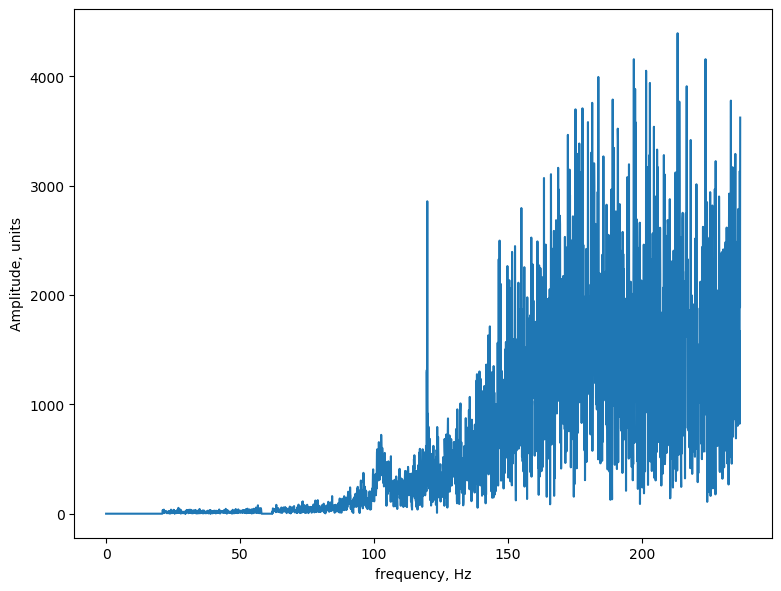

In [86]:
for i,f in enumerate(freq):
    if f < 62 and f > 58:# (1)
        fft_spectrum[i] = 0.0
    if f < 21 or f > 20000:# (2)
        fft_spectrum[i] = 0.0
        
# Let's look again on the spectrum. 
plt.plot(freq[:3000], np.abs(fft_spectrum[:3000]))
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, units")
plt.show()